In [143]:
from realstatement_visualizing import Realstatement_visualizing
import pandas as pd
import numpy as np
import platform
from matplotlib import font_manager, rc

from config import default_config_file

In [144]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mplt
titanic_df = pd.read_csv('./data/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [146]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [147]:
titanic_df.shape

(891, 12)

In [148]:
"""
survival	생존여부	0 = No, 1 = Yes
PassengerId 테스트 시 문제로 제공됨
- pclass	승선권	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	성별
- name 이름
Age	나이
- sibsp	동반한 형제, 자매, 배우자
- parch	동반한 부모,자식
- ticket	티켓번호
- fare	티켓의 요금
- cabin	객실번호
- embarked	승선한 항구명 C = 쉐부로, Q = 퀸즈타운, S = 사우스햄톤
"""


'\nsurvival\t생존여부\t0 = No, 1 = Yes\nPassengerId 테스트 시 문제로 제공됨\n- pclass\t승선권\t1 = 1st, 2 = 2nd, 3 = 3rd\n- sex\t성별\n- name 이름\nAge\t나이\n- sibsp\t동반한 형제, 자매, 배우자\n- parch\t동반한 부모,자식\n- ticket\t티켓번호\n- fare\t티켓의 요금\n- cabin\t객실번호\n- embarked\t승선한 항구명 C = 쉐부로, Q = 퀸즈타운, S = 사우스햄톤\n'

In [149]:
class titanic_visualizing(Realstatement_visualizing):
    def __init__(self):
        plt.rcParams["figure.figsize"] = (8,6) #그래프 사이즈 가로,세로 단위는 인치
        plt.rcParams['lines.linewidth'] = 2 #선의 두께
        plt.rcParams['lines.color'] = 'r'#선의 색
        plt.rcParams['axes.grid'] = True#격자
        plt.rcParams['axes.unicode_minus']= False#마이너스 표시가능
        if platform.system() == 'Darwin': #맥os 사용자의 경우 폰트 설정
            plt.style.use('seaborn-whitegrid')
            plt.rcParams['font.family']= 'AppleGothic'
    def titanic_load_csv_file(self, file_name) -> object:
        #print(file_name)
        data = super().load_csv_file(file_name)
        return data
    def bar_chart(self, data, x, y, hue):
        sns.barplot(data = data,x = x, y=y, hue=hue)
        return
    def plt_setting(self,x):
        plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.07),#범례 아래 가운데 가게끔 설정
                   ncol=2,fontsize=13,#ncol = 범례 열 수
                   frameon=True,shadow=True)#범례 틀, 그림자 효과
        plt.xlabel(xlabel=x, labelpad=10,fontdict=default_config_file.tick_font,loc='center')#축 라벨 설정
        plt.ylabel(ylabel='count',labelpad=10,fontdict=default_config_file.tick_font,loc='center')#축 라벨 설정
        #plt.xlim([0,5])#축 범위 설정
        #plt.ylim(0,400)#축 범위 설정
        plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, labelcolor='green', top=True)#축 세부 설정
        plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=12, width=2, color='r')#축 세부 설정
        return plt
    def count_chart(self, data, x,hue):
        ax = sns.countplot(data = data,x = x, hue=hue, palette='Set3',order =data[x].value_counts().index)#order = 그래프 순서
        #order를 기반으로 포인터를 개발했기 때문에 order를 삭제하면 그래프가 이상해짐 추후 숙제
        #ax = sns.countplot(data = data,x = x, hue=hue, palette='Set3',order =data[x].value_counts().index)
        plt = self.plt_setting(x)
        plt.title(f'{x}에 따른 {hue}',pad=30,fontdict=default_config_file.title_font)#타이틀 제목 pad=그래프와의 간격
        x_list,y_list =[],[]
        for p in ax.patches:#막대 차트 값 표시
            height = p.get_height()
            plt.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 13)
            x_list.append(p.get_x())
            y_list.append(height)
        ax.annotate('최댓값',#그래프 내에 포인트 표시
            xy=(x_list[y_list.index(max(y_list))]+ax.patches[0].get_width() / 2.,max(y_list)),      # 화살표 뾰족한 부분 좌표
            xytext=(x_list[y_list.index(max(y_list))]*-(len(x_list)-2),max(y_list)-(max(y_list)/4)),   # 화살표 뾰족한 부분 반대편 글자 좌표
            arrowprops=dict(facecolor='blue', shrink=0.1),
            horizontalalignment='right',
            verticalalignment='top',
            #bbox=dict(boxstyle="round4,pad=.5", fc="0.5"),#글자 박싱
            size=30,color='b',
            clip_on=False)  # clip to the axes bounding box
        ax.annotate('최솟값',#그래프 내에 포인트 표시
            xy=(x_list[y_list.index(min(y_list))]+ax.patches[0].get_width() / 2.,min(y_list)),      # 화살표 뾰족한 부분 좌표
            xytext=(x_list[y_list.index(max(y_list))]*-(len(x_list)-2),max(y_list)-(max(y_list)/3)),   # 화살표 뾰족한 부분 반대편 글자 좌표
            arrowprops=dict(facecolor='red', shrinkA=10,shrinkB=20,arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=-90,rad=10"),
            horizontalalignment='right',
            verticalalignment='top',
            #bbox=dict(boxstyle="round4,pad=.5", fc="0.5"),#글자 박싱
            size=30,color='r',
            clip_on=False)  # clip to the axes bounding box

        plt.show()
        plt.clf()#plt 닫기(다음 그래프와 겹치지 않도)


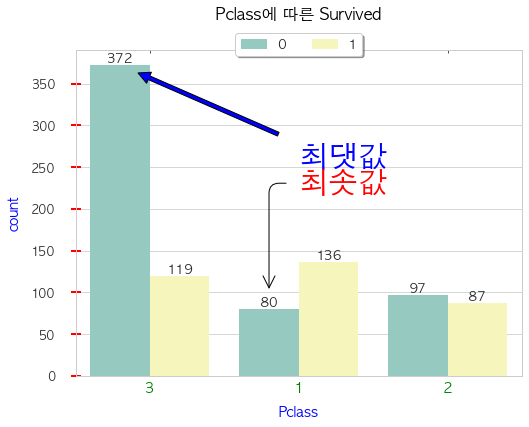

<Figure size 576x432 with 0 Axes>

In [150]:
titanic_df = titanic_visualizing().titanic_load_csv_file("train")
titanic_visualizing().count_chart(titanic_df,x='Pclass',hue='Survived')
#titanic_visualizing.plot_survived_dead(titanic_df)
#titanic_visualizing.plot_sex(titanic_df)
#titanic_visualizing.bar_chart(titanic_df,'Pclass')

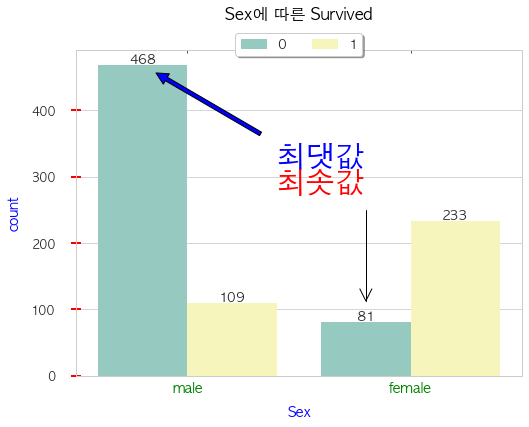

<Figure size 576x432 with 0 Axes>

In [151]:
titanic_visualizing().count_chart(titanic_df,x='Sex',hue='Survived')

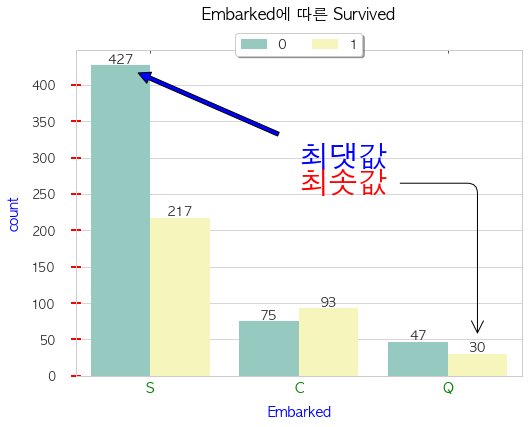

<Figure size 576x432 with 0 Axes>

In [152]:
titanic_visualizing().count_chart(titanic_df,x='Embarked',hue='Survived')

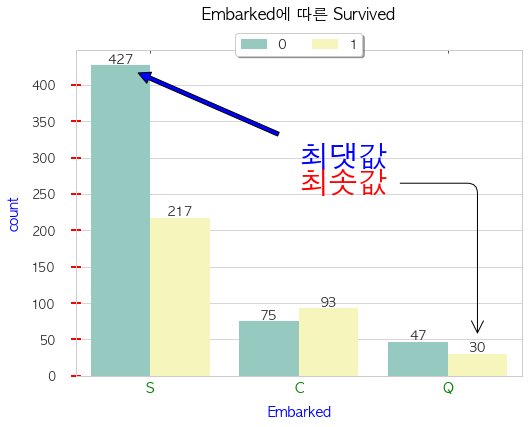

<Figure size 576x432 with 0 Axes>

In [153]:
titanic_visualizing().count_chart(titanic_df,x='Embarked',hue='Survived')


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


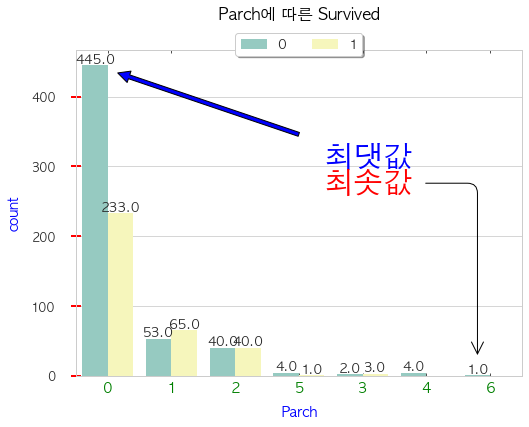

<Figure size 576x432 with 0 Axes>

In [154]:
titanic_visualizing().count_chart(titanic_df,x='Parch',hue='Survived')


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


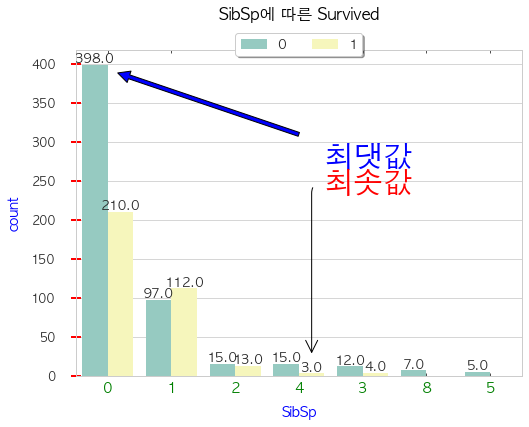

<Figure size 576x432 with 0 Axes>

In [155]:
titanic_visualizing().count_chart(titanic_df,x='SibSp',hue='Survived')